In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=';')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [7]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [17]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [18]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
 df_test.quality, test_predictions
)

In [19]:
train_accuracy

0.768

In [20]:
test_accuracy

0.5993322203672788

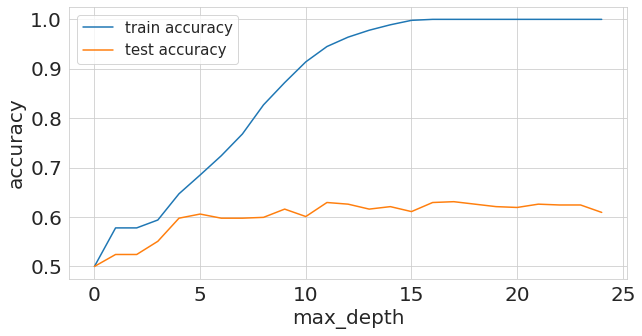

In [24]:
# NOTE: this code is written in a jupyter notebook
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## K-fold validation

In [1]:
import pandas as pd
from sklearn import model_selection

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df['kfold'] = -1

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
kf = model_selection.KFold(n_splits=5)

In [10]:
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.5,0.180,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,0
1,11.5,0.300,0.60,2.00,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6,0
2,7.3,0.320,0.23,2.30,0.066,35.0,70.0,0.99588,3.43,0.62,10.1,5,0
3,10.3,0.430,0.44,2.40,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6,0
4,8.1,0.575,0.22,2.10,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.9,0.540,0.45,2.30,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5,4
1595,7.1,0.430,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5,4
1596,11.9,0.390,0.69,2.80,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6,4
1597,8.4,0.635,0.36,2.00,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4,4


## Stratified K-Fold

In [16]:
from sklearn import model_selection

In [19]:
# Training data is in a csv file called train.csv
df = pd.read_csv("winequality-red.csv", delimiter=';')
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.2,0.310,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7,-1
1,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,-1
2,10.4,0.640,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5,-1
3,8.2,0.700,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,5,-1
4,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.8,0.430,0.32,2.8,0.080,29.0,58.0,0.99740,3.31,0.64,10.3,5,-1
1595,9.2,0.630,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,5,-1
1596,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,-1
1597,6.0,0.500,0.04,2.2,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,5,-1


In [21]:
# fetch targets
y = df.quality.values

In [23]:
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

Text(0, 0.5, 'count')

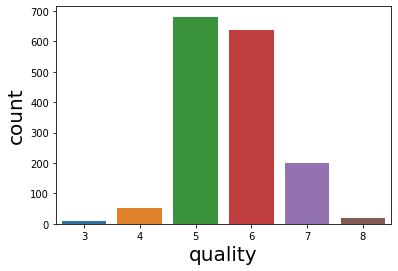

In [27]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

## Stratified K-Fold for Regression

In [3]:
from sklearn import datasets
from sklearn import model_selection

In [4]:
def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1

    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )

    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    # drop the bins column
    data = data.drop("bins", axis=1)
    # return data

In [5]:
# we create a sample dataset with 15000 samples
# and 100 features and 1 target
X, y = datasets.make_regression(
n_samples=15000, n_features=100, n_targets=1
)
# create a dataframe out of our numpy arrays
df = pd.DataFrame(
X,
columns=[f"f_{i}" for i in range(X.shape[1])]
)
df.loc[:, "target"] = y

In [6]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,0.208431,-0.269470,0.011548,-0.193339,-0.715137,0.451445,-2.836168,1.343775,1.022238,0.938443,...,-1.541827,0.321572,-0.678285,0.947015,-0.083602,0.585773,-0.277485,0.031941,0.443849,-84.308340
1,1.250930,0.485088,0.909584,1.479782,-2.146690,-0.006678,0.145036,0.395929,-1.237529,0.248373,...,0.256746,0.679038,-0.351320,0.300896,1.247087,1.430657,-0.326977,-0.529099,-0.350957,-305.827761
2,1.499192,-0.571391,-1.545949,-0.936613,-1.638908,-0.085499,0.459432,0.175458,-0.243577,0.422566,...,-0.107743,1.830706,1.330392,-0.328152,0.697027,-1.503030,1.050598,-1.796497,-1.445873,117.442394
3,-0.180495,-0.384430,0.382912,0.437211,-0.126133,-0.608387,-1.445389,0.100944,0.995747,-1.104794,...,2.194710,-1.830937,-0.382018,0.070566,-0.813935,0.741060,-0.123191,0.619328,-0.331133,148.730679
4,-1.275814,2.125377,-0.753490,-0.644862,-0.960244,0.702929,0.695248,1.071599,1.876592,0.476323,...,-0.002817,1.451998,1.909521,-0.032076,-1.574207,0.252505,1.000022,0.671495,-0.055585,-77.034391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.552148,-0.621460,0.330079,-1.359356,-0.618038,-1.159241,0.055121,-0.005309,0.458080,0.723943,...,-0.678778,-1.582813,-1.299154,-0.010066,-1.168554,-2.239331,1.219553,-1.732593,0.090669,-7.020448
14996,-0.296468,0.365554,-0.820628,-0.965709,-0.706238,-0.461919,-1.308948,0.796099,-0.552696,1.023761,...,-0.162596,0.198570,-0.007622,1.522847,-1.172980,-1.048874,1.488895,-1.432809,-1.666888,-226.405820
14997,-0.074006,-0.608961,0.232530,0.292162,-0.063801,0.717270,-3.083896,2.013375,0.017459,-0.495271,...,0.599191,-0.405907,2.505700,1.444406,-0.365472,2.013457,-1.137915,-0.452190,-1.114944,5.175073
14998,0.570874,-0.444503,0.041972,0.265095,-0.577095,-1.291049,-2.563772,-0.087591,-0.002708,-0.357762,...,-0.749186,2.431234,1.467107,-1.427013,0.352750,-0.677059,-0.541270,0.705928,-0.488621,262.368910


In [7]:
# create folds
df = create_folds(df)

/home/matt_song/miniconda3/envs/py376/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [8]:
df